IMPORT THE LIBRARIES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Load the Training Dataset

In [ ]:
dataset_train=pd.read_csv("/content/Google_Stock_Test (2023).csv")
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900


Use the Open Stock Price Column to Train your Model

In [ ]:
training_set=dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[ 89.589996]
 [ 90.349998]
 [ 87.470001]
 [ 86.790001]
 [ 88.360001]
 [ 85.980003]
 [ 89.18    ]
 [ 91.480003]
 [ 90.849998]
 [ 92.059998]
 [ 92.139999]
 [ 90.720001]
 [ 95.099998]
 [ 97.949997]
 [ 98.099998]
 [ 95.57    ]
 [ 96.5     ]
 [ 97.309998]
 [ 97.480003]
 [ 96.870003]
 [ 98.709999]
 [105.800003]
 [102.93    ]
 [102.400002]
 [103.220001]
 [102.050003]
 [100.      ]
 [ 95.449997]
 [ 94.739998]
 [ 94.43    ]
 [ 94.489998]
 [ 95.370003]
 [ 94.849998]
 [ 93.      ]
 [ 91.699997]
 [ 91.919998]
 [ 89.440002]
 [ 89.870003]
 [ 89.330002]
 [ 89.980003]
 [ 89.660004]
 [ 92.480003]
 [ 94.019997]
 [ 94.980003]
 [ 94.120003]
 [ 94.050003]
 [ 92.169998]
 [ 90.089996]
 [ 92.559998]
 [ 93.220001]
 [ 96.199997]
 [100.260002]
 [100.120003]
 [101.25    ]
 [104.269997]
 [105.059998]
 [104.989998]
 [104.620003]
 [102.440002]
 [102.279999]
 [100.910004]
 [101.300003]
 [102.389999]
 [104.330002]
 [105.779999]
 [105.260002]
 [106.980003]
 [106.550003]
 [106.580002]
 [105.839996]
 [106.889999]
 [104.

Normalizing the Dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_training_set=scaler.fit_transform(training_set)
scaled_training_set

array([[0.07901058],
       [0.09564446],
       [0.03261103],
       [0.01772813],
       [0.05209013],
       [0.        ],
       [0.07003715],
       [0.12037646],
       [0.10658778],
       [0.1330706 ],
       [0.13482155],
       [0.10374258],
       [0.19960595],
       [0.26198283],
       [0.26526584],
       [0.20989271],
       [0.23024728],
       [0.2479754 ],
       [0.25169624],
       [0.2383454 ],
       [0.27861671],
       [0.433793  ],
       [0.37097831],
       [0.35937844],
       [0.37732545],
       [0.35171814],
       [0.30685048],
       [0.20726625],
       [0.19172677],
       [0.18494196],
       [0.18625511],
       [0.20551545],
       [0.1941343 ],
       [0.15364407],
       [0.12519139],
       [0.13000647],
       [0.07572772],
       [0.08513899],
       [0.07332019],
       [0.08754652],
       [0.08054282],
       [0.14226309],
       [0.17596837],
       [0.19697967],
       [0.17815717],
       [0.1766251 ],
       [0.13547813],
       [0.089

Creating X_train and y_train Data structures

In [ ]:
X_train=[]
y_train=[]
for i in range(60,143):
  X_train.append(scaled_training_set[i-60:i,0])
  y_train.append(scaled_training_set[i,0])
X_train=np.array(X_train)
y_train=np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(83, 60)
(83,)


Reshape the data

In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_train.shape

(83, 60, 1)

 Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM.


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
regressor= Sequential()
regressor.add(LSTM(units=50, return_sequences= True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

Fitting the model

In [ ]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=100, batch_size=32)

Epoch 1/100
3/3 [==============================] - 7s 21ms/step - loss: 0.4408
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 0.1779
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0612
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0398
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0417
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0572
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0291
Epoch 8/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0265
Epoch 9/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0264
Epoch 10/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0190
Epoch 11/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0198
Epoch 12/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0214
Epoch 13/100
3/3 [==============================]

Extracting the Actual Stock Prices

In [ ]:
dataset_test=pd.read_csv("/content/Google_Stock_Test (2023).csv")
actual_stock_price=dataset_test.iloc[:,1:2].values

Preparing the Input for the Model.

In [ ]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)- len(dataset_test)-60:].values

inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

X_test=[]
for i in range(60,200):
  X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

 Predicting the Values

In [ ]:
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

5/5 [==============================] - 0s 8ms/step


Plotting the Actual and Predicted Prices for Google Stocks

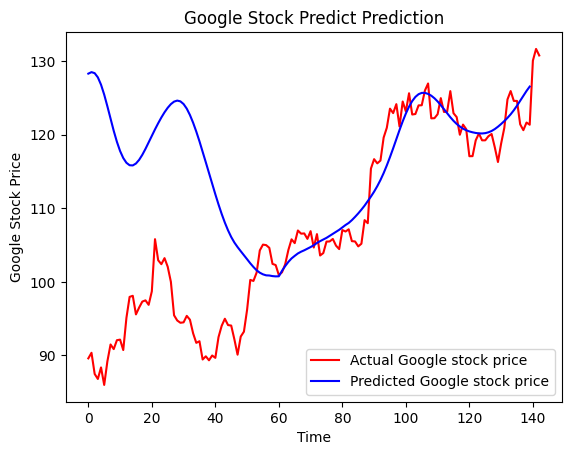

In [ ]:
plt.plot(actual_stock_price, color='red',label='Actual Google stock price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google stock price')
plt.title('Google Stock Predict Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()